In [1]:
def generate_harvard_citation(author,year,title,url,access_date):
    citation= f'{author},{year}.{title}..Available at: {url} [Accesed] {access_date}]'
    return citation

In [2]:
# Example usage
author = "Anurag Dhadse"
year = "2021"
title ='Removing Outliers. Understanding How and What behind the Magic.'
url = "https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff"
access_date = "22-12-2023"
citation = generate_harvard_citation(author, year, title, url, access_date)
print(citation)

Table of Contents
1  Problem Definition
1.1  Project Overview
1.2  Problem Statement
2  Dataset Analysis
2.1  Importing Python libraries
2.2  Importing the data
2.3  Data Description and Exploratory Visualisations
2.3.1  Overview
2.3.2  Numerical features overview
2.4  Feature distribution by target attribute
2.4.1  Age
2.4.2  Education
2.4.3  Gender
2.4.4  Marital Status
2.4.5  Distance from Home
2.4.6  Department
2.4.7  Role and Work Conditions
2.4.8  Years at the Company
2.4.9  Years With Current Manager
2.4.10  Work-Life Balance Score
2.4.11  Pay/Salary Employee Information
2.4.12  Employee Satisfaction and Performance Information
2.5  Target Variable: Attrition
2.6  Correlation
2.7  EDA Concluding Remarks
3  Pre-processing Pipeline
3.1  Encoding
3.2  Feature Scaling
3.3  Splitting data into training and testing sets
4  Building Machine Learning Models
4.1  Baseline Algorithms
4.2  Logistic Regression
4.2.1  Fine-tuning
4.2.2  Evaluation
4.3  Random Forest Classifier
4.3.1  Fine-tuning
4.3.2  Evaluation
4.4  ROC Graphs
5  Concluding Remarks
5.1  Risk Category
5.2  Strategic Retention Plan

In [3]:
from IPython.display import HTML

HTML('''<script>

code_show=true;

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

}

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

1.1 Project Overview

As a data analyst, our task is to prepare and analyse the data set using appropriate data preparation,
statistical techniques and ML models. Our analysis will aim to identify any relationships or trends in the
data that can be used to improve employee satisfaction and productivity.

A study by the Center for American Progress  on employee turnover showed that replacing a worker costs around 20% of their compensation. Increased turnover can result in significant expenditures that can be avoided by providing workplace flexibility and earned sick days at little or no cost.

Thus, most firms still find employee replacement expensive. The time spent interviewing and finding a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee adjusts to the new workplace

1.2 Problem Statement

Understanding why and when employees depart might help retain them.The reasons people quit a job can help us create a retention plan to boost employee satisfaction and productivity.Step-by-step systematic approach employing a strategy that can be utilised for many ML problems. This project falls under "HR Anlytics" or "People Analytics".

This study aims to tackle the problem statement:

What are the factors behind former employees leaving the company?
What are the key signs of employee turnover?
What policies or tactics may be implemented based on the results to boost employee happiness and productivity? 

Since we have data on previous employees, this is a normal supervised classification problem with a binary label: 0 (current employee), 1 (former employee). We investigate the probability of an employee leaving the organisation (Y).

2. Dataset Analysis

2.1 Importing Libraries

In [4]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [5]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly
import chart_studio.plotly as py

import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [6]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [7]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
from tabulate import tabulate
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

2.2 Importing The Data

In [8]:
# Read Excel file
df_sourcefile = pd.read_csv('Employee_Attrition.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (1470, 35)


2.3  Data Description and Exploratory Visualisations

2.3.1  Overview

In [9]:
# Make a copy of the original source file
df_HR = df_sourcefile.copy()

# Select numerical columns
numerical_columns = df_HR.select_dtypes(include=['float64', 'int32']).columns
df_num = df_HR[numerical_columns]

# Select categorical columns
categorical_columns = df_HR.select_dtypes(include=['object']).columns
df_cat = df_HR[categorical_columns]

# Round numerical columns to 2 decimal points
df_num = df_num.round(2)

# Display the columns in each DataFrame
print("Numerical Columns:")
print(df_num.columns)

print("\nCategorical Columns:")
print(df_cat.columns)


Numerical Columns:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Categorical Columns:
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [10]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

# Select numerical columns
numerical_columns= df_HR.select_dtypes(include=['float64','int32']).columns
df_num=df_HR[numerical_columns]
categorical_columns= df_HR.select_dtypes(include=['object']).columns
df_cat= df_HR[categorical_columns]

# Round numerical columns to 2 decimal points
df_num = df_num.round(2)


# Dataset columns
print('Numerical Columns:')
print(df_num.columns)

print("\nCategorical Columns")
print(df_cat.columns)

Numerical Columns:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Categorical Columns
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [11]:
#  Columns by data type
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{float64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [12]:
# Dataset header
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,NaN,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,2771.699080,27189.905714,0.772793,NaN,Yes,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.601575,17675.541599,10.118125,NaN,NaN,11.920147,3.282183,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [13]:
#  Information on columns
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

2.3.2  Numerical & Categotical features overview

In [14]:
# Summary of each numerical attribute
df_HR.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1323.0,36.64,9.88,14.54,29.62,34.95,42.75,69.40
DailyRate,1323.0,802.03,414.03,86.83,456.48,782.96,1130.58,1784.39
DistanceFromHome,1323.0,9.09,8.18,0.75,2.15,6.92,13.58,33.68
Education,1323.0,2.92,1.07,0.77,2.12,3.02,3.70,6.29
EmployeeCount,1323.0,1.00,0.10,0.63,0.93,1.00,1.07,1.29
EmployeeNumber,1323.0,1026.68,610.48,1.05,501.85,1022.03,1533.81,2530.92
EnvironmentSatisfaction,1323.0,2.73,1.13,0.76,1.89,2.89,3.68,5.25
HourlyRate,1323.0,65.65,21.47,23.86,47.70,64.93,83.04,123.20
JobInvolvement,1323.0,2.74,0.77,0.72,2.18,2.86,3.18,5.24
JobLevel,1323.0,2.06,1.13,0.72,1.05,1.94,2.61,5.94


In [15]:
# we have used describe function on oyr day_night column
df_HR.describe(include = ['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1323,1323,1323,1323,1323,1323,1323,1323,1323
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1065,890,824,504,783,281,596,1323,929


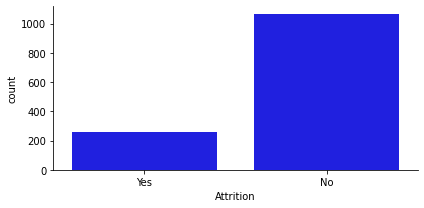

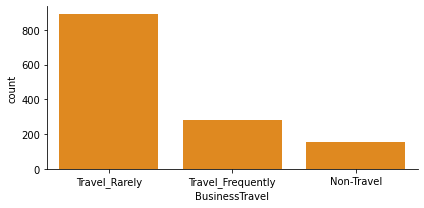

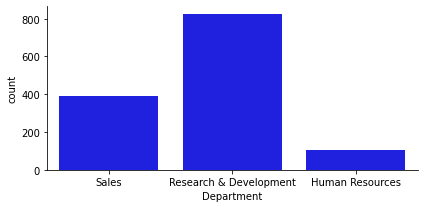

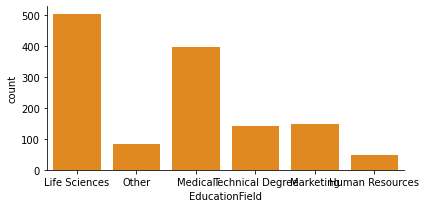

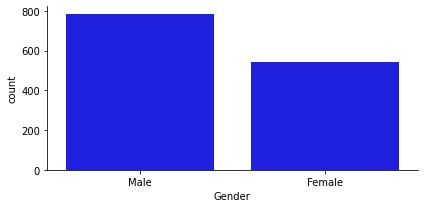

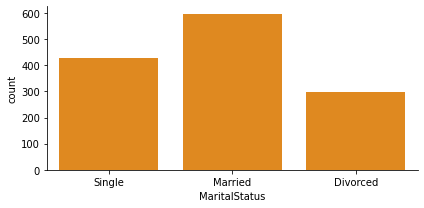

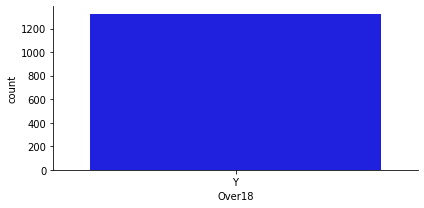

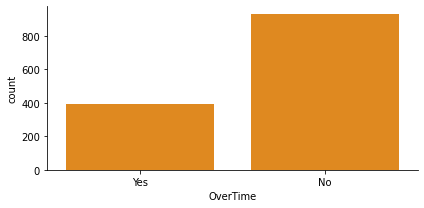

In [16]:
# Create a countplot for all the categorical data
sns.catplot(x='Attrition', kind='count', data=df_HR, height=3, aspect=2,color='blue')
sns.catplot(x='BusinessTravel', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
sns.catplot(x='Department', kind='count', data=df_HR, height=3, aspect=2,color='blue')
sns.catplot(x='EducationField', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
sns.catplot(x='Gender', kind='count', data=df_HR, height=3, aspect=2,color='blue')
sns.catplot(x='MaritalStatus', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
sns.catplot(x='Over18', kind='count', data=df_HR, height=3, aspect=2,color='blue')
sns.catplot(x='OverTime', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')


An observation from the countplots the attrition class our target variable is imbalanced. this can problems for a machine learning models and lead to subotimal outcomes due to biased model training, poor generalization & model evaluation challenges.
The over 18 column only has one value we may consider this to be redundant as it contains only one value & thus has little or no predictive value.

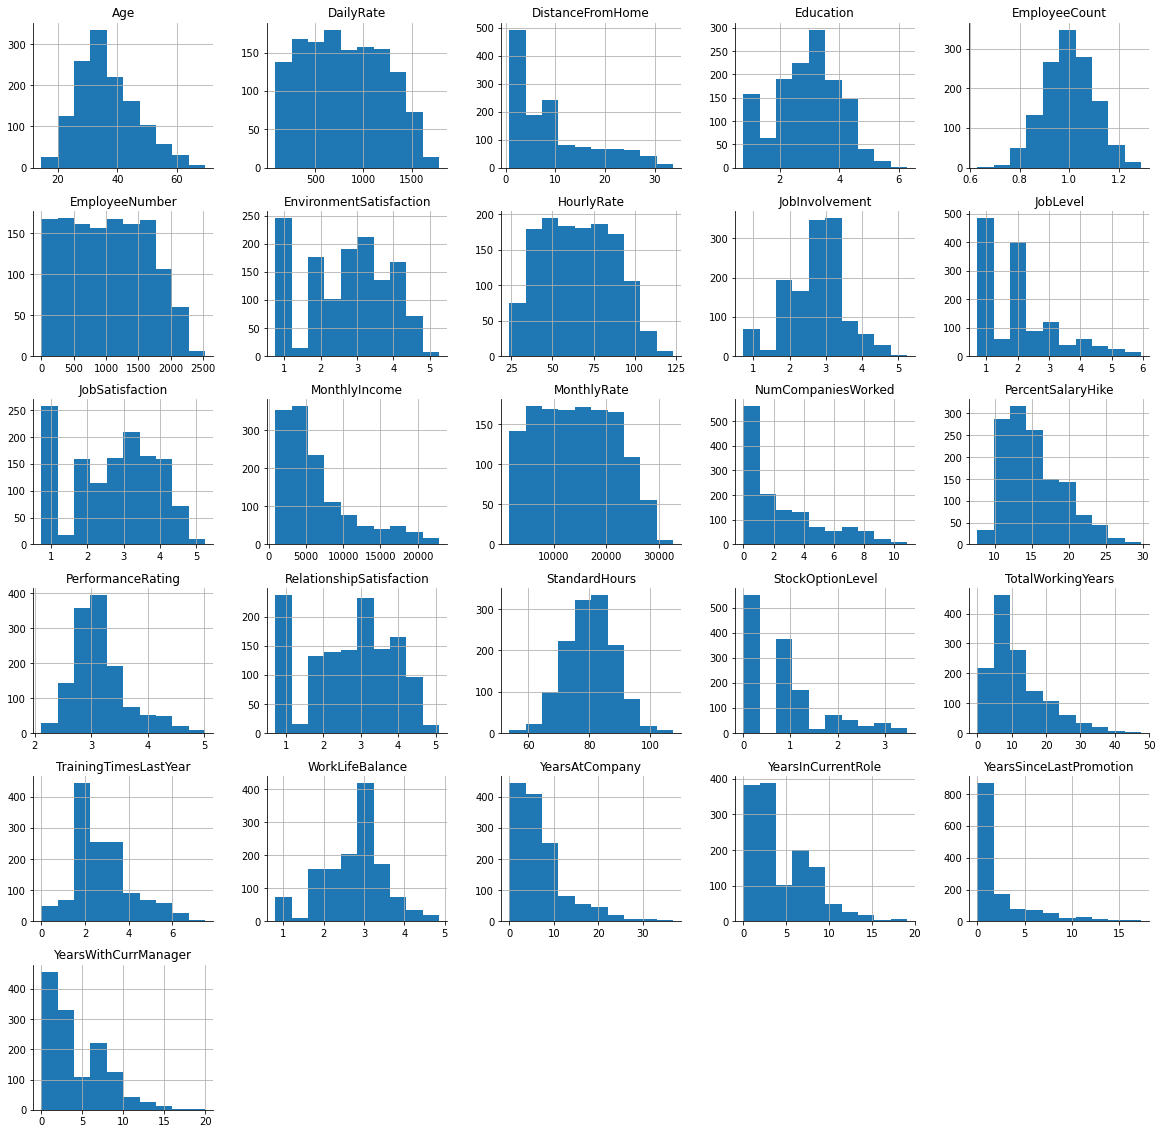

In [17]:
# Create a Histogram For all the Numerical Data
df_HR.hist(figsize=(20,20))
sns.despine()
plt.grid(False)
plt.show()

A few observations can be made based on the information and histograms for numerical features:
Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
Employee Number is likely to be a unique identifier for employees given the feature's uniform distribution

In [18]:
# Discover missing values in the datbase
df_HR.isnull().values.any()# this code will tell me if i have any null values in my dataset

True

In [19]:
# Check missing values in the datbase
df_HR.isnull().sum() # this code will tell me where my missing values are

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [20]:
# we use this code to drop missing values axis = 0 is rows all rows with na wil be dropped
new_df=df_HR.dropna (axis=0) 

new_df.isnull().values.any()

False

In [21]:
#  Check dataset if we drop all missing values
new_df.shape

(40, 35)

In [22]:
# Create a summary of the data before Imputation
print('Before  Median Imputation:')
summary_before_imputation= df_num.describe().round(2).transpose()
print(summary_before_imputation)

Before  Median Imputation:
                           count      mean      std      min      25%  \
Age                       1323.0     36.64     9.88    14.54    29.62   
DailyRate                 1323.0    802.03   414.03    86.83   456.48   
DistanceFromHome          1323.0      9.09     8.18     0.75     2.15   
Education                 1323.0      2.92     1.07     0.77     2.12   
EmployeeCount             1323.0      1.00     0.10     0.63     0.93   
EmployeeNumber            1323.0   1026.68   610.48     1.05   501.86   
EnvironmentSatisfaction   1323.0      2.73     1.13     0.76     1.90   
HourlyRate                1323.0     65.65    21.47    23.86    47.70   
JobInvolvement            1323.0      2.74     0.77     0.72     2.18   
JobLevel                  1323.0      2.06     1.13     0.72     1.05   
JobSatisfaction           1323.0      2.72     1.15     0.72     1.85   
MonthlyIncome             1323.0   6544.72  4766.58   891.48  2961.84   
MonthlyRate             

In [23]:
# Impute  with the median as a first process
median_imputed_df= df_num.fillna(df_num.median())

In [24]:
# Create a summary of the data after Imputation
print('After  Median Imputation:')
summary_after_imputation= median_imputed_df.describe().round(2).transpose()
print(summary_after_imputation)

After  Median Imputation:
                           count      mean      std      min      25%  \
Age                       1470.0     36.47     9.39    14.54    30.36   
DailyRate                 1470.0    800.12   392.81    86.83   502.68   
DistanceFromHome          1470.0      8.87     7.79     0.75     2.26   
Education                 1470.0      2.93     1.02     0.77     2.20   
EmployeeCount             1470.0      1.00     0.09     0.63     0.94   
EmployeeNumber            1470.0   1026.21   579.13     1.05   539.36   
EnvironmentSatisfaction   1470.0      2.74     1.07     0.76     1.96   
HourlyRate                1470.0     65.58    20.37    23.86    49.03   
JobInvolvement            1470.0      2.75     0.73     0.72     2.26   
JobLevel                  1470.0      2.05     1.07     0.72     1.07   
JobSatisfaction           1470.0      2.73     1.09     0.72     1.94   
MonthlyIncome             1470.0   6385.95  4546.84   891.48  3177.68   
MonthlyRate              

In [25]:
# Create a comparison for before & after  median imputaion
absolute_difference_mean = abs(median_imputed_df.mean() - df_num.mean())
absolute_difference_median = abs(median_imputed_df.median() - df_num.median())
percentage_difference_std = abs((median_imputed_df.std() - df_num.std()) / df_num.std()) * 100

# Create a DataFrame to store the comparison results
comparison_results = pd.DataFrame({
    'Absolute Difference (Mean)': absolute_difference_mean,
    'Absolute Difference (Median)': absolute_difference_median,
    'Percentage Difference (Std)': percentage_difference_std
     })

# Display comparison results
print('Comparison Results For Median Imputation:')
print(comparison_results)

Comparison Results For Median Imputation:
                          Absolute Difference (Mean)  \
Age                                         0.168526   
DailyRate                                   1.906995   
DistanceFromHome                            0.217097   
Education                                   0.009636   
EmployeeCount                               0.000088   
EmployeeNumber                              0.464924   
EnvironmentSatisfaction                     0.016356   
HourlyRate                                  0.071769   
JobInvolvement                              0.011701   
JobLevel                                    0.011823   
JobSatisfaction                             0.018460   
MonthlyIncome                             158.764844   
MonthlyRate                                10.604472   
NumCompaniesWorked                          0.094450   
PercentSalaryHike                           0.079578   
PerformanceRating                           0.008928   
Relati

<function matplotlib.pyplot.show(close=None, block=None)>

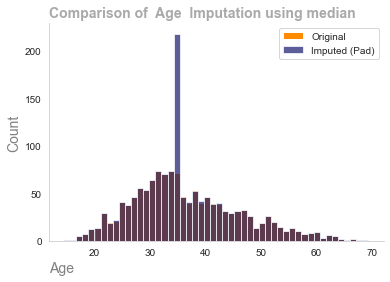

In [26]:
# Compare in a histogram the two imputations methods
original_age_data=df_HR['Age']
imputed_age_data=median_imputed_df['Age']
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_age_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Age',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Age  Imputation using median',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [27]:
# create a differnt imputation Method
pad_imputed_df= df_num.fillna(method='pad')

In [28]:
# Create a comparison for before & after  pad imputaion
absolute_difference_mean = abs(pad_imputed_df.mean() - df_num.mean())
absolute_difference_median = abs(pad_imputed_df.median() - df_num.median())
percentage_difference_std = abs((pad_imputed_df.std() - df_num.std()) / df_num.std()) * 100

# Create a DataFrame to store the comparison results
comparison_results = pd.DataFrame({
    'Absolute Difference (Mean)': absolute_difference_mean,
    'Absolute Difference (Median)': absolute_difference_median,
    'Percentage Difference (Std)': percentage_difference_std
     })

# Display comparison results
print('Comparison Results:')
print(comparison_results)

Comparison Results:
                          Absolute Difference (Mean)  \
Age                                         0.130998   
DailyRate                                   5.732611   
DistanceFromHome                            0.076366   
Education                                   0.002800   
EmployeeCount                               0.000293   
EmployeeNumber                              2.856522   
EnvironmentSatisfaction                     0.010188   
HourlyRate                                  0.184300   
JobInvolvement                              0.002428   
JobLevel                                    0.009354   
JobSatisfaction                             0.003642   
MonthlyIncome                              18.740633   
MonthlyRate                                27.075302   
NumCompaniesWorked                          0.012156   
PercentSalaryHike                           0.034238   
PerformanceRating                           0.000996   
RelationshipSatisfaction    

<function matplotlib.pyplot.show(close=None, block=None)>

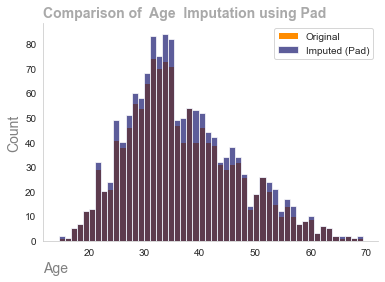

In [29]:
# Compare in a histogram the two imputations methods
original_age_data=df_HR['Age']
imputed_age_data=pad_imputed_df['Age']
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_age_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Age',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Age  Imputation using Pad',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

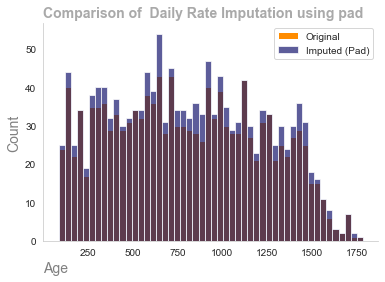

In [30]:
# Compare in a histogram the two imputations methods
original_age_data=df_HR['DailyRate']
imputed_age_data=pad_imputed_df['DailyRate']
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_age_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Age',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Daily Rate Imputation using pad',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [31]:
# Use median to impute data
df_num["DailyRate"].fillna(df_num["DailyRate"].median()) 

0        990.11
1        276.78
2       1204.16
3       1352.75
4        485.05
         ...   
1465     914.06
1466     574.68
1467     151.51
1468     995.98
1469     703.68
Name: DailyRate, Length: 1470, dtype: float64

In [32]:
# Calutame mode values befor & after imputation 
daily_median_imp= df_num['DailyRate'].median()
daily_median_org= df_HR['DailyRate'].median()

print(f" The median of the 'Daily Income after median imputaion is: {daily_median_imp}")
print(f" The median of the 'Daily Income original is: {daily_median_org}")

 The median of the 'Daily Income after median imputaion is: 782.96
 The median of the 'Daily Income original is: 782.9587046101927


<function matplotlib.pyplot.show(close=None, block=None)>

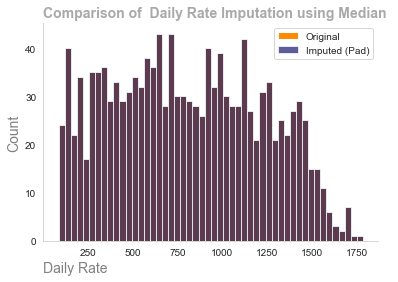

In [33]:
# Creat histograms of oringinal & Imputed
original_daily_data=df_HR['DailyRate']
imputed_daily_data=df_num['DailyRate']
sns.set_style('whitegrid')

# Histogram  
plt.figure(figsize=(6,4))
plt.hist(original_daily_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_daily_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Daily Rate',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Daily Rate Imputation using Median ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [34]:
# Use median to impute data
df_num["MonthlyIncome"].fillna(df_num["MonthlyIncome"].median()) 

0       6438.95
1       4457.66
2       2124.55
3       2771.70
4       3254.60
         ...   
1465    2806.95
1466    4957.07
1467    6609.84
1468    5585.30
1469    5188.88
Name: MonthlyIncome, Length: 1470, dtype: float64

In [35]:
# Calutame mode values befor & after imputation 
monthly_mean_imp= df_num['MonthlyIncome'].median()
monthly_mean_org= df_HR['MonthlyIncome'].median()

print(f" The median of the 'Monthly Income after imputaion is: {monthly_mean_imp}")
print(f" The median of the 'Monthly Income original is: {monthly_mean_org}")

 The median of the 'Monthly Income after imputaion is: 4957.07
 The median of the 'Monthly Income original is: 4957.070474605795


<function matplotlib.pyplot.show(close=None, block=None)>

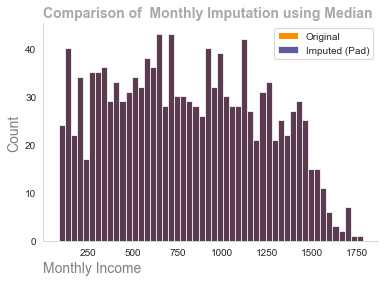

In [36]:
# Creat histograms of oringinal & Imputed
original_monthly_data=df_HR['MonthlyIncome']
imputed_monthly_data=df_num['MonthlyIncome']
sns.set_style('whitegrid')


# Histogram 
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_daily_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Monthly Income',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Monthly Imputation using Median ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [37]:
# Use median to impute data
df_num["MonthlyRate"].fillna(df_num["MonthlyRate"].median()) 

0       20845.10
1       24877.90
2        2262.94
3       27189.91
4       17675.54
          ...   
1465    13077.12
1466    21026.15
1467    14258.29
1468    11837.89
1469    10276.02
Name: MonthlyRate, Length: 1470, dtype: float64

In [38]:
# Calutame mode values befor & after imputation 
monthly_mean_imp= df_num['MonthlyRate'].median()
monthly_mean_org= df_HR['MonthlyRate'].median()

print(f" The median of the 'Monthly Rate after imputaion is: {monthly_mean_imp}")
print(f" The median of the 'Monthly Rate original is: {monthly_mean_org}")

 The median of the 'Monthly Rate after imputaion is: 14258.29
 The median of the 'Monthly Rate original is: 14258.2933653424


<function matplotlib.pyplot.show(close=None, block=None)>

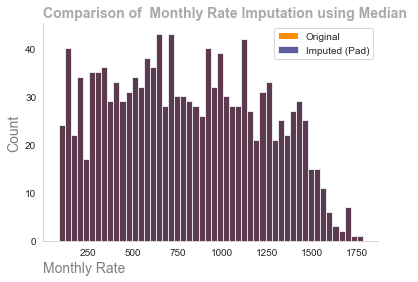

In [39]:
# Creat histograms of oringinal & Imputed
original_monthly_data=df_HR['MonthlyRate']
imputed_monthly_data=df_num['MonthlyRate']
sns.set_style('whitegrid')


# Histogram 
plt.figure(figsize=(6,4))
plt.hist(original_age_data,bins=50,color="darkorange", label='Original')
plt.hist(imputed_daily_data,bins=50,color="midnightblue",alpha=0.7 ,label='Imputed (Pad)')
plt.xlabel('Monthly Rate',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
plt.title('Comparison of  Monthly Rate Imputation using Median ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.legend()
sns.despine()
plt.grid(False)
plt.show

In [40]:
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [41]:

# Create a list to us pad to imputate features
columns_to_pad=['Age',  'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

columns_to_median= ['DailyRate','MonthlyIncome','MonthlyRate']

pad_imputed_df= df_num[columns_to_pad].fillna(method='pad',axis=0)

median_imputed_df = df_num[columns_to_median].fillna(df_num[columns_to_median].median())

final_imputed_df = pd.concat([df_num.drop(columns=columns_to_pad + columns_to_median),pad_imputed_df,median_imputed_df],
                            axis=1)

In [42]:
final_imputed_df.head()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,95.61,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10
1,51.59,1.02,1.04,0.94,2.11,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,85.37,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90
2,33.13,2.20,2.12,0.81,4.01,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,76.25,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94
3,34.71,2.94,3.67,0.82,4.59,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,75.89,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91
4,24.79,1.99,1.12,0.82,7.23,1.08,40.43,3.12,0.94,1.70,10.12,11.92,3.28,3.03,72.67,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54


In [43]:
#  missing values 
final_imputed_df.isnull().sum() # this code will tell me where my missing values are

Age                         0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
DailyRate                   0
MonthlyIncome               0
MonthlyRate                 0
dtype: int64

In [44]:
# Catgotical columns
df_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [45]:
# categorical head of data
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,NaN,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,NaN,NaN


In [46]:
# Drop over 18 column as it only contains one value and has little predictive power ans is a redundant feature
df_cat.drop(columns='Over18',inplace=True)

In [47]:
# categorical head of data
df_cat.head(1)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes


In [48]:
# we use this code to drop missing values axis = 0 is rows all rows with na wil be dropped
new_df=df_cat.dropna (axis=0) 

new_df.isnull().values.any()

False

In [49]:
# Create new shape
new_df.shape

(618, 8)

In [50]:
# missing values 
df_cat.isnull().sum() # this code will tell me where my missing values are

Attrition         147
BusinessTravel    147
Department        147
EducationField    147
Gender            147
JobRole           147
MaritalStatus     147
OverTime          147
dtype: int64

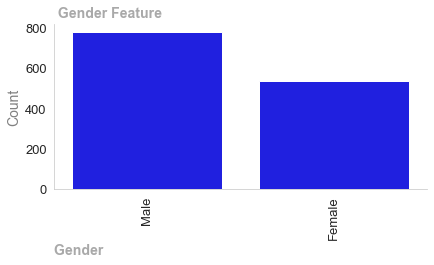

In [51]:
# Create catplot for feature
sns.catplot(x='Gender', kind='count', data=df_cat, height=3, aspect=2,color='blue')

# Adding x_axis & ylabel label
plt.xlabel('Gender ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title(' Gender Feature',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

df_cat["Gender"].fillna(df_cat["Gender"].mode()) # if data is skewed we use median

In [52]:
# check  where my missing values are in categorical column
df_cat.isnull().sum() 

Attrition         147
BusinessTravel    147
Department        147
EducationField    147
Gender            147
JobRole           147
MaritalStatus     147
OverTime          147
dtype: int64

In [53]:
# Creat a new feature no gender
df_cat["Gender"].fillna("No Gender", inplace= True)

In [54]:
# Have a look at the new feature
unique_values=df_cat['Gender'].unique()
print(unique_values)

['Male' 'Female' 'No Gender']


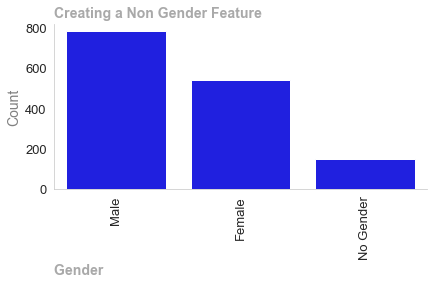

In [55]:
# Create catplot for feature
sns.catplot(x='Gender', kind='count', data=df_cat, height=3, aspect=2,color='blue')

# Adding x_axis & ylabel label
plt.xlabel('Gender ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Creating a Non Gender Feature',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

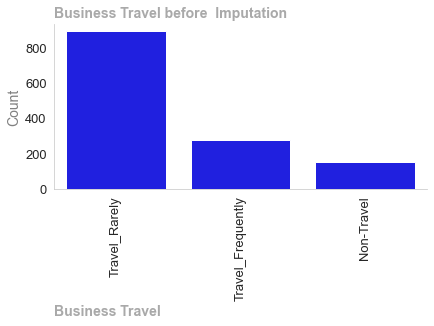

In [56]:
# Create catplot for feature
sns.catplot(x='BusinessTravel', kind='count', data=df_cat, height=3, aspect=2,color='blue')
 
# Adding x_axis & ylabel label
plt.xlabel('Business Travel',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Business Travel before  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [57]:
# Unique values for the dataset
unique_values=df_cat['BusinessTravel'].unique()
print(unique_values)

['Travel_Rarely' 'Travel_Frequently' nan 'Non-Travel']


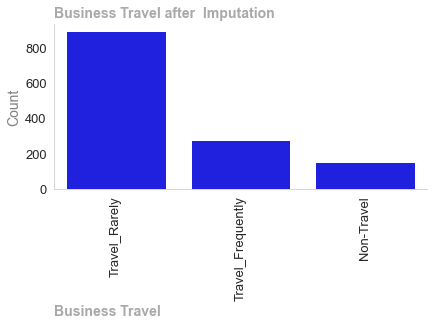

In [58]:
# Create catplot for feature
sns.catplot(x='BusinessTravel', kind='count', data=df_cat, height=3, aspect=2,color='blue')
 
# Adding x_axis & ylabel label
plt.xlabel('Business Travel',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Business Travel after  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [59]:
# Use mode to impute categorical data
df_cat["BusinessTravel"].fillna(df_cat["BusinessTravel"].mode().iloc[0], inplace=True) # if data is skewed we use median

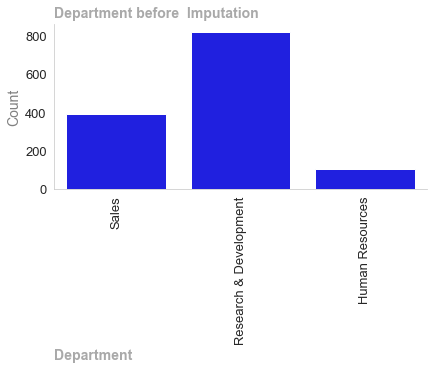

In [60]:
# Create catplot for feature
sns.catplot(x='Department', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Department',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Department before  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [61]:
# Use mode to impute categorical data
df_cat["Department"].fillna(df_cat["Department"].mode().iloc[0], inplace=True) # if data is skewed we use median

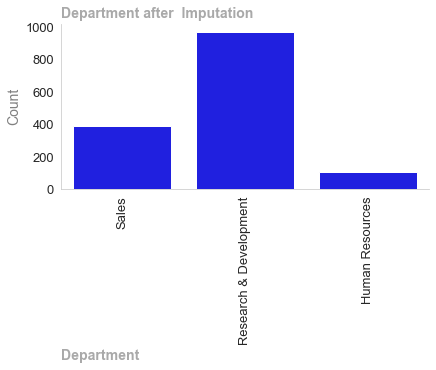

In [62]:
# Create catplot for feature
sns.catplot(x='Department', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Department',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Department after  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

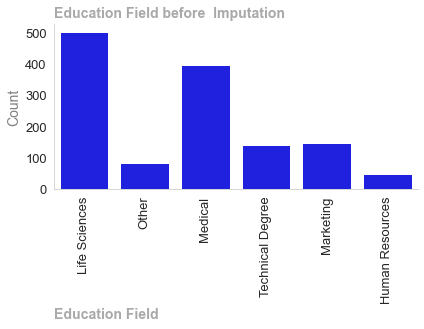

In [63]:
# Create catplot for feature
sns.catplot(x='EducationField', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Education Field',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Education Field before  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [64]:
# Use mode to impute categorical data
df_cat["EducationField"].fillna(df_cat["EducationField"].mode().iloc[0], inplace=True) # if data is skewed we use median

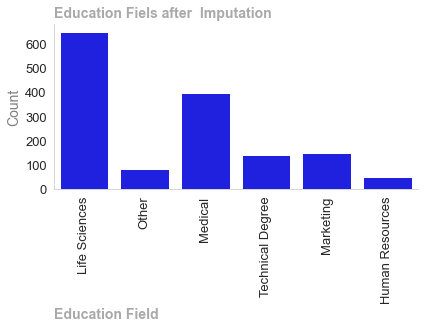

In [65]:
# Create catplot for feature
sns.catplot(x='EducationField', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Education Field',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Education Fiels after  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

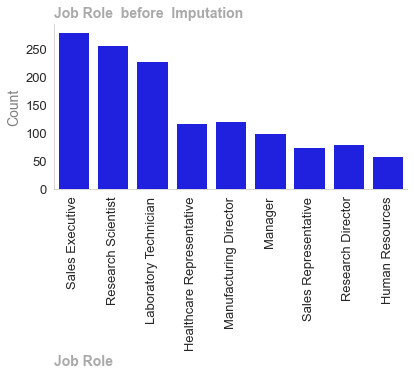

In [66]:
# Create catplot for feature
sns.catplot(x='JobRole', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Job Role',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Job Role  before  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [67]:
# Use mode to impute categorical data
df_cat["JobRole"].fillna(df_cat["JobRole"].mode().iloc[0], inplace=True) # if data is skewed we use median

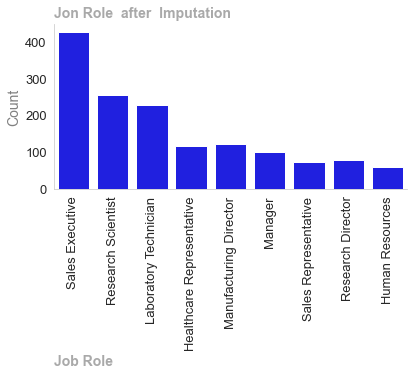

In [68]:
# Create catplot for feature
sns.catplot(x='JobRole', kind='count', data=df_cat, height=3, aspect=2,color='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Job Role',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Jon Role  after  Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

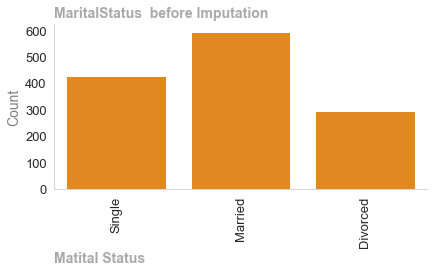

In [69]:
# Create catplot for feature
sns.catplot(x='MaritalStatus', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Matital Status',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('MaritalStatus  before Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13,rotation= 90)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()


In [70]:
# Use mode to impute categorical data
df_cat["MaritalStatus"].fillna(df_cat["MaritalStatus"].mode().iloc[0], inplace=True)

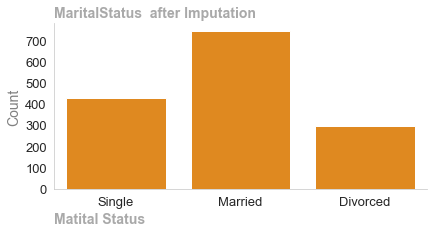

In [71]:
# Create catplot for feature
sns.catplot(x='MaritalStatus', kind='count', data=df_cat, height=3, aspect=2,color='darkorange')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Matital Status',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('MaritalStatus  after Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

plt.show()

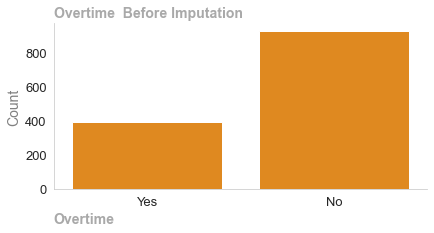

In [72]:
# Create catplot for feature
sns.catplot(x='OverTime', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Overtime',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Overtime  Before Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()


In [73]:
# Use mode to impute categorical data
df_cat["OverTime"].fillna(df_cat["OverTime"].mode().iloc[0], inplace=True) # if data is skewed we use median

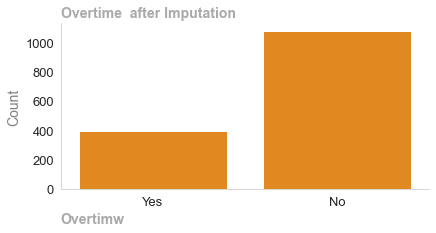

In [74]:
# Create catplot for feature
sns.catplot(x='OverTime', kind='count', data=df_cat, height=3, aspect=2,color='darkorange')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Overtimw',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Overtime  after Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

sns.catplot(x='Attrition', kind='count', data=df_HR, height=3, aspect=2,color='darkorange')
plt.show()

df_cat["Attrition"].fillna(df_cat["Attrition"].mode().iloc[0], inplace=True) # if data is skewed we use median

sns.catplot(x='Attrition', kind='count', data=df_cat, height=3, aspect=2,color='darkorange')
plt.show()

In [75]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [76]:
# missing values 
df_cat.isnull().sum() 

Attrition         147
BusinessTravel      0
Department          0
EducationField      0
Gender              0
JobRole             0
MaritalStatus       0
OverTime            0
dtype: int64

In [77]:
df_cat.head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


# Independent variables
df_cat_temp= df_cat.drop(columns=['Attrition'])

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()


# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_cat_temp.columns[1:]:
    if df_cat_temp[col].dtype == 'object':
        if len(list(df_cat_temp[col].unique())) <= 2:
            le.fit(df_cat_temp[col])
            df_cat_temp[col] = le.transform(df_cat_temp[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

df_cat_temp.columns

In [78]:
df_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

# convert rest of categorical variable into dummy
df_cat_temp = pd.get_dummies(df_cat_temp, drop_first=True)

df_cat_encoded = pd.concat([df_cat_temp, df_cat['Attrition']], axis=1)

# Display the updated DataFrame
print(df_cat_encoded.head(5))

df_cat_encoded.columns

df_cat=df_cat_encoded

In [79]:
final_imputed_df.head(1)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.4,7.08,9.9,2.84,1.01,95.61,0.0,8.06,0.0,1.05,5.8,3.99,0.0,4.59,990.11,6438.95,20845.1


In [80]:
# use concat function to add cleaned data back to one dataframe
df_new= pd.concat([df_cat,final_imputed_df], axis=1)

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
num_col = list(final_imputed_df.columns)
for col in num_col:
    final_imputed_df[col] = final_imputed_df[col].astype(float)
    final_imputed_df[[col]] = scaler.fit_transform(final_imputed_df[[col]])
final_imputed_dfd=final_imputed_df.round(2)
final_imputed_df.head()

#  Hamza b,2018.Building an Employee Churn Model in Python to Develop a Strategic Retention Plan..Available at: https://medium.com/towards-data-science/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d [Accesed] 14-12-2023]

In [81]:
# combined dataframe head
df_new.head(1)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.4,7.08,9.9,2.84,1.01,95.61,0.0,8.06,0.0,1.05,5.8,3.99,0.0,4.59,990.11,6438.95,20845.1


In [82]:
# check dataframe missing values
df_new.isnull().sum() 

Attrition                   147
BusinessTravel                0
Department                    0
EducationField                0
Gender                        0
JobRole                       0
MaritalStatus                 0
OverTime                      0
Age                           0
DistanceFromHome              0
Education                     0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
NumCompaniesWorked            0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
DailyRat

In [83]:
# check shape of the 
df_new.shape

(1470, 34)

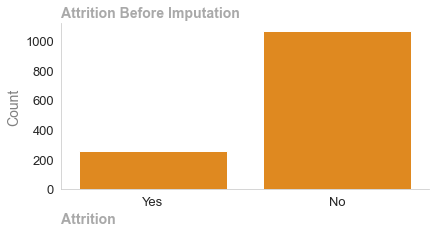

In [84]:

# Create a plot for Attrition plot
sns.catplot(x='Attrition', kind='count', data=df_new, height=3, aspect=2,color='darkorange') 
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Attrition',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Attrition Before Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

In [85]:
# Use mode to impute categorical data
df_new["Attrition"].fillna(df_new["Attrition"].mode().iloc[0], inplace=True) # if data is skewed we use median

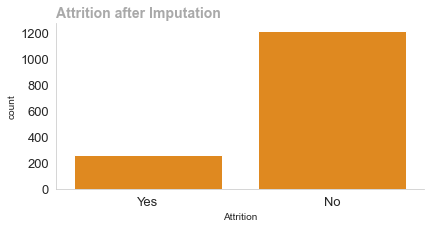

In [86]:
# Create catplot for feature
sns.catplot(x='Attrition', kind='count', data=df_new, height=3, aspect=2,color='darkorange') 
# Adding a title to the plot
plt.title('Attrition after Imputation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.show()

In [87]:
# Check that we have dealt with missing values
df_new.isnull().values.any()

False

In [88]:
# Check the head of the data
df_new.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Yes,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.40,7.08,9.90,2.84,1.01,95.61,0.00,8.06,0.00,1.05,5.80,3.99,0.00,4.59,990.11,6438.95,20845.10
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,51.59,1.02,1.04,0.94,2.11,3.47,52.30,1.81,1.79,1.58,1.11,9.90,4.12,4.31,85.37,1.10,8.97,3.26,2.53,10.07,7.94,1.03,5.90,276.78,4457.66,24877.90
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,33.13,2.20,2.12,0.81,4.01,3.98,87.27,1.88,0.83,3.30,5.54,15.40,2.78,2.33,76.25,0.00,8.43,3.00,2.92,0.00,0.00,0.00,0.00,1204.16,2124.55,2262.94
3,No,Travel_Frequently,Sales,Life Sciences,Female,Research Scientist,Married,Yes,34.71,2.94,3.67,0.82,4.59,3.73,56.38,2.93,1.10,3.22,0.77,9.76,2.77,3.03,75.89,0.00,7.66,2.86,3.12,8.44,5.56,2.85,0.00,1352.75,2771.70,27189.91
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,24.79,1.99,1.12,0.82,7.23,1.08,40.43,3.12,0.94,1.70,10.12,11.92,3.28,3.03,72.67,0.95,6.24,2.81,3.11,2.04,1.97,2.50,2.22,485.05,3254.60,17675.54


In [89]:
# Unique values for the dataset
unique_values=df_new['Attrition'].unique()
print(unique_values)

['Yes' 'No']


In [90]:
def get_correct_label(y):
    """
    This function converts the class labels
    from 'no' and 'yes' to 0 and 1 respectively
    """
    return y.replace(['No','Yes'],[0,1])

print(df_new['Attrition'].unique())
df_new['Attrition'] = get_correct_label(df_new['Attrition'])
print(df_new['Attrition'].unique())

['Yes' 'No']
[1 0]


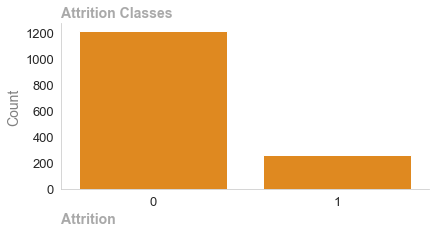

In [91]:
# Create a plot for Attrition plot
sns.catplot(x='Attrition', kind='count', data=df_new, height=3, aspect=2,color='darkorange') 
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Attrition',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Adding a title to the plot
plt.title('Attrition Classes',fontsize=14,fontweight='bold',color='darkgrey',loc='left')

# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)

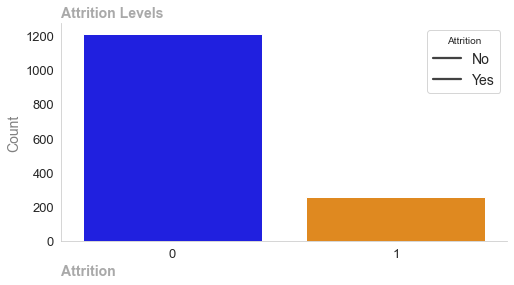

The number of peope who stayed is:  1212
The number of leavers  is:  258


In [92]:
plt.figure(figsize=(8,4))

colors=['blue','darkorange']
# Create a plot for Attrition plot
sns.barplot(x=df_new['Attrition'].value_counts().index,y=df_new['Attrition'].value_counts(),
           hue=df_new['Attrition'].value_counts().index, palette=colors, dodge=False)
plt.title('Attrition Levels', fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# Setting the font size for the x_axis & y_axis
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Attrition',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')

# Turing off the grid for better aesthetics
sns.despine()
plt.grid(False)
plt.legend(title='Attrition', loc='upper right',fontsize=14, labels=['No','Yes'])
plt.show()

print('The number of peope who stayed is: ',df_new['Attrition'].value_counts()[0])
print('The number of leavers  is: ',df_new['Attrition'].value_counts()[1])

In [93]:
# Select numerical columns
numerical_columns= df_new.select_dtypes(include=['float64','int32','int64']).columns
df_num=df_new[numerical_columns]
categorical_columns= df_new.select_dtypes(include=['object']).columns
df_cat= df_new[categorical_columns]

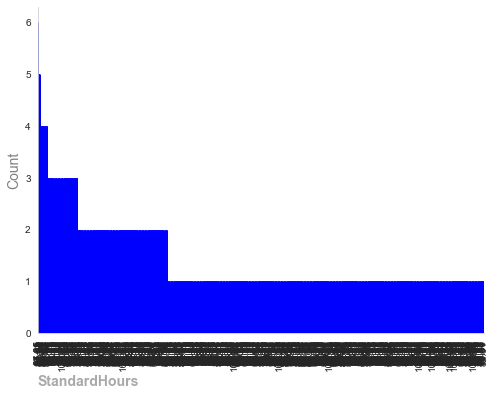

In [94]:
# Set figure for the plot
plt.figure(figsize=(8,6))

# Create catplot for feature
df_num['StandardHours'].value_counts().plot (kind='bar', color='lightcoral', edgecolor='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('StandardHours',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()


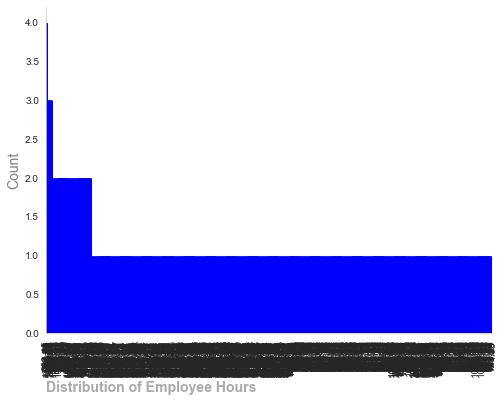

In [95]:
# Set figure for the plot
plt.figure(figsize=(8,6))

# Create catplot for feature
df_num['EmployeeNumber'].value_counts().plot (kind='bar', color='lightcoral', edgecolor='blue')
# Adding a title to the plot
# Adding x_axis & ylabel label
plt.xlabel('Distribution of Employee Hours',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

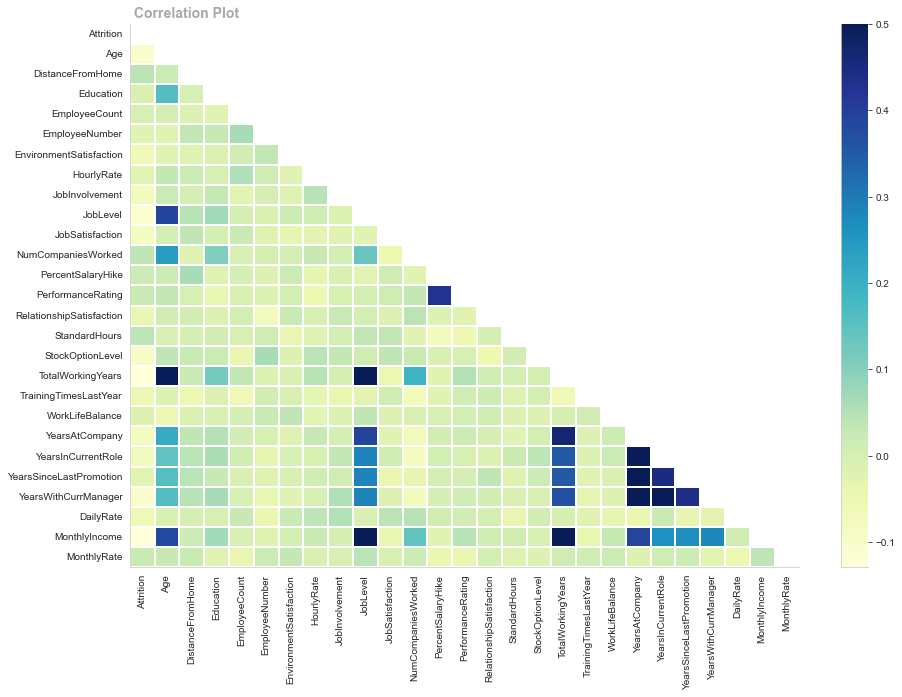

In [96]:
# Calculate correlations
corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

# Adding a title to the plot
plt.title(' Correlation Plot ',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
sns.despine()
plt.grid(False)


In [97]:
df_num.columns

Index(['Attrition', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DailyRate', 'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

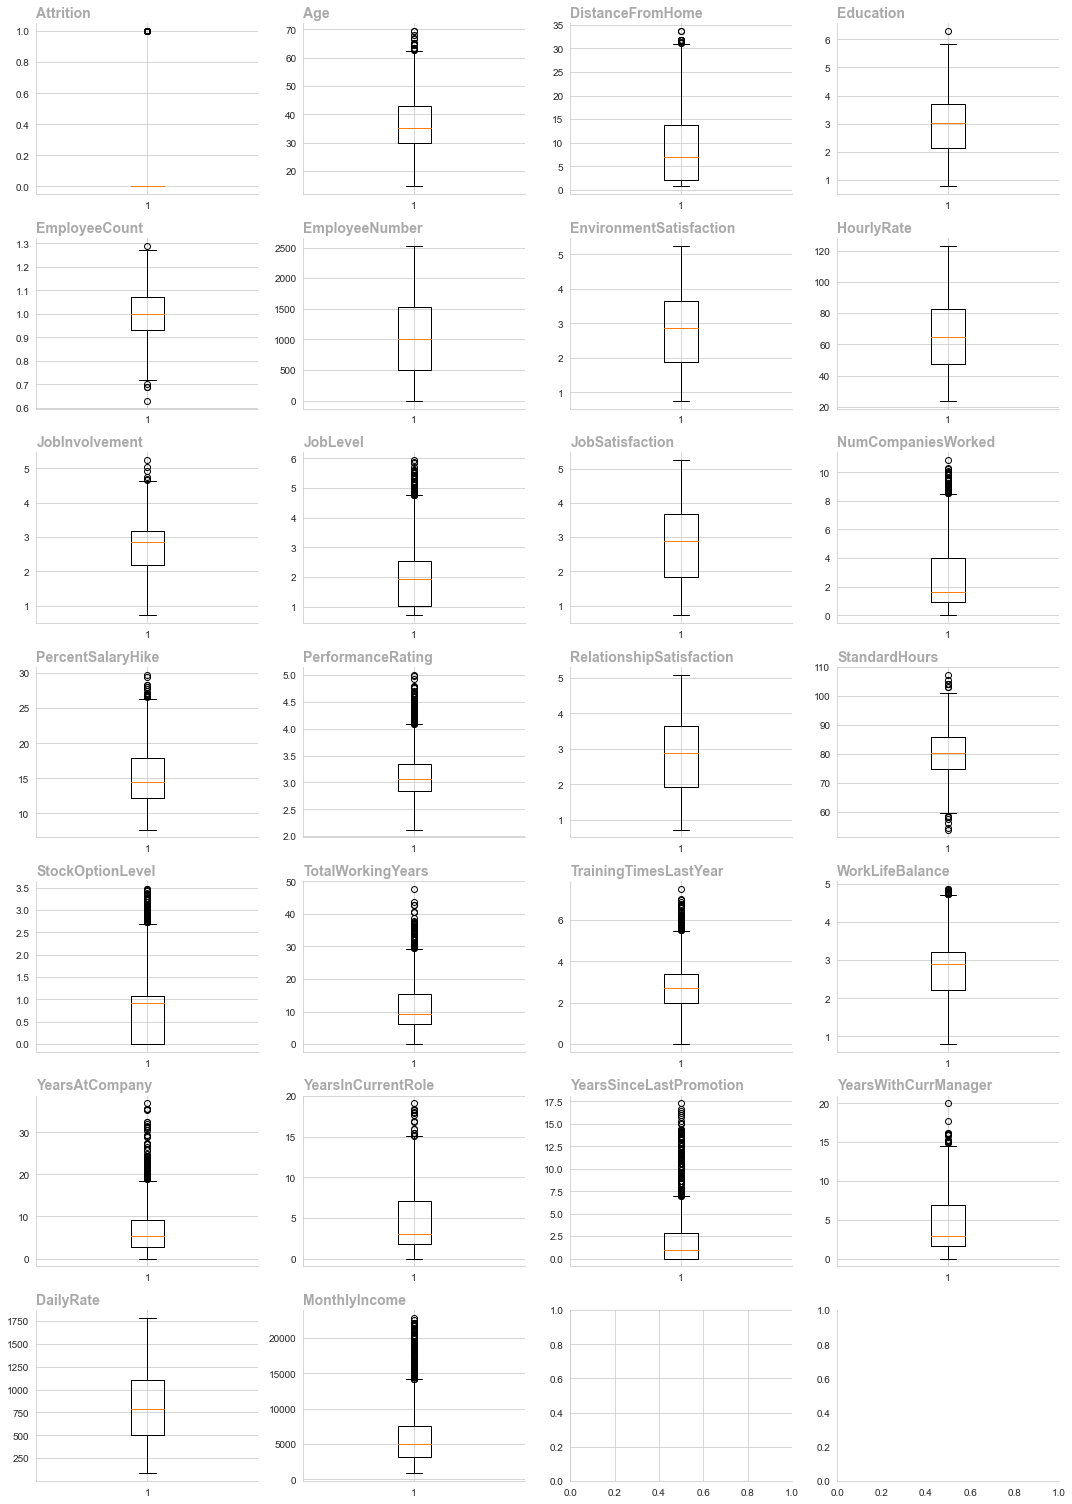

In [98]:
# Get the numbers of columns in the dataset
num_cols=len(df_num.columns)
# Calculate the numners of rows and columns for the subplot layout
rows= (num_cols - 1) // 4 +1
cols= min(num_cols, 4)
# Create Subplots
fig,axes= plt.subplots(rows,cols,figsize=(15, 3 * rows))
# Flattent the axrs
axes=axes.flatten()
# plot each columns in the subplot
for i, col in enumerate(list(df_num.columns)[:-1]):
    axes[i].boxplot(df_num[col], vert=True)
    axes[i].set_title(col,fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# Adjust layout    
sns.despine()
plt.grid(False)    
plt.tight_layout()
plt.show()

In [99]:
# Summary of each numerical attribute
df_num.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.18,0.38,0.00,0.00,0.00,0.00,1.00
Age,1470.0,36.77,9.90,14.54,29.85,35.02,42.86,69.40
DistanceFromHome,1470.0,9.17,8.24,0.75,2.16,6.98,13.70,33.68
Education,1470.0,2.92,1.08,0.77,2.13,3.01,3.69,6.29
EmployeeCount,1470.0,1.00,0.10,0.63,0.93,1.00,1.07,1.29
EmployeeNumber,1470.0,1023.82,610.66,1.05,494.78,1014.53,1530.20,2530.92
EnvironmentSatisfaction,1470.0,2.72,1.13,0.76,1.89,2.88,3.65,5.25
HourlyRate,1470.0,65.46,21.33,23.86,47.56,64.93,82.77,123.20
JobInvolvement,1470.0,2.74,0.77,0.72,2.18,2.86,3.17,5.24
JobLevel,1470.0,2.05,1.12,0.72,1.04,1.93,2.53,5.94


In [101]:
# create fuvtion to idenidy outliers with an if else statement

def determine_outlier_thresholds_iqr(column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    iqr = Q3 - Q1
    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    return lower_limit, upper_limit

def check_outliers_iqr(column):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(column)
    if column[(column > upper_limit) | (column < lower_limit)].any(axis=None):
        return True
    else: 
        return False

#  check for outliers 

def replace_with_thresholds_iqr(dataframe, cols, th1=0.05, th3=0.95, replace=False):

    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_iqr(dataframe[col_name])
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe[col_name])
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace: 
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_iqr(dataframe[col_name])
            data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using IQR")
    print(table)

columns_to_process = ['Age', 'DistanceFromHome', 'JobInvolvement', 'JobLevel', 'NumCompaniesWorked',
                       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                       'MonthlyIncome']
#  process columnswith outliers 
replace_with_thresholds_iqr(df_num, columns_to_process, replace=True)

## Anurag Dhadse,2021.Removing Outliers. Understanding How and What behind the Magic...Available at: https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff [Accesed] 22-12-2023]

Removing Outliers using IQR
=======================  ==========  =======  =======================  =============  =============
Outliers (Previously)    Outliers      Count  Column                     Lower Limit    Upper Limit
=======================  ==========  =======  =======================  =============  =============
True                     False            15  Age                            10.3288        62.3787
True                     False            10  DistanceFromHome              -15.1462        31.0037
True                     False             6  JobInvolvement                   0.695          4.655
True                     False            50  JobLevel                      -1.19125        4.75875
True                     False            45  NumCompaniesWorked               -3.58            8.5
True                     False            15  PercentSalaryHike               3.6625        26.4025
True                     False            58  TotalWorkingYears         

In [ ]:
# Add an overall title
fig.suptitle("Boxplots of Numeric Columns", fontsize=16, fontweight='bold', color='navy')

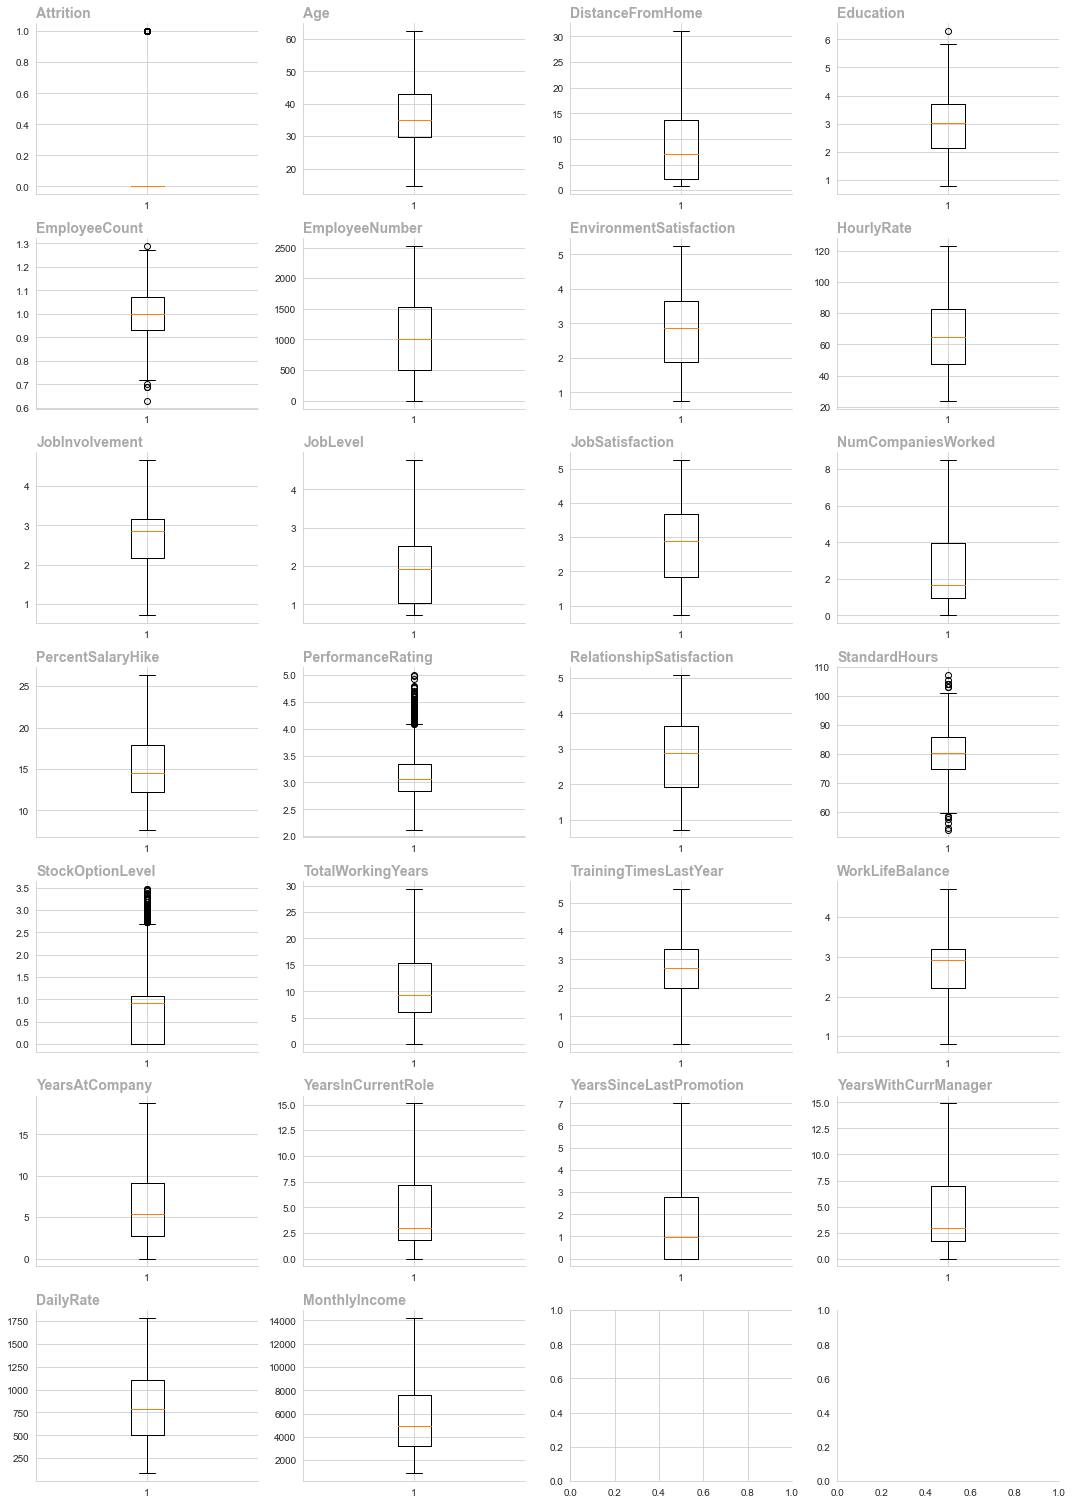

In [113]:
# Get the numbers of columns in the dataset
num_cols=len(df_num.columns)
# Calculate the numners of rows and columns for the subplot layout
rows= (num_cols - 1) // 4 +1
cols= min(num_cols, 4)
# Create Subplots
fig,axes= plt.subplots(rows,cols,figsize=(15, 3 * rows))
# Flattent the axrs
axes=axes.flatten()
# plot each columns in the subplot
for i, col in enumerate(list(df_num.columns)[:-1]):
    axes[i].boxplot(df_num[col], vert=True)
    axes[i].set_title(col,fontsize=14,fontweight='bold',color='darkgrey',loc='left')
# Adjust layout    
sns.despine()
plt.grid(False)    
plt.tight_layout()



plt.show()

In [106]:
df_num.head(1)

,Attrition,Age,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,MonthlyIncome,MonthlyRate
0,1,41.92,1.02,1.77,1.03,1.05,2.15,93.83,3.43,2.46,3.4,7.08,9.9,2.84,1.01,95.61,0.0,8.06,0.0,1.05,5.8,3.99,0.0,4.59,990.11,6438.95,20845.1


In [107]:
df_num.shape

(1470, 27)

 Feature distribution by target attribute

In [ ]:
# Set meaningful index labels
attrition_means.index = ['No Attrition', 'Attrition']

In [161]:
Attrition = df_num.groupby('Attrition')
attrition_means=Attrition.mean()

attrition_means.index= ['Employed','Left']

transpose_means=attrition_means.transpose()

print(transpose_means)

                              Employed          Left
Age                          37.190027     34.609336
DistanceFromHome              9.004461      9.893881
Education                     2.924942      2.901589
EmployeeCount                 0.999010      0.997946
EmployeeNumber             1030.559051    992.177597
EnvironmentSatisfaction       2.749307      2.560969
HourlyRate                   65.729472     64.213450
JobInvolvement                2.765483      2.618081
JobLevel                      2.091541      1.761240
JobSatisfaction               2.754480      2.511047
NumCompaniesWorked            2.604728      2.840930
PercentSalaryHike            15.283715     15.475213
PerformanceRating             3.142657      3.174729
RelationshipSatisfaction      2.744992      2.624496
StandardHours                80.079068     80.885349
StockOptionLevel              0.841568      0.633798
TotalWorkingYears            11.730730      9.130775
TrainingTimesLastYear         2.823380      2.

In [166]:
age_bins=[20,30,40,50,60]
age_labels=['20-29','30-39','40-49','50-59']

df_num['Age']= pd.cut(df_num['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

contingency_table= pd.crosstab(df_num['Age'],df_num['Attrition'], margins=True)
print(contingency_table)

Attrition     0    1   All
Age                       
20-29       272   82   354
30-39       495  109   604
40-49       278   33   311
50-59       122   25   147
All        1167  249  1416


In [167]:
probabilities=contingency_table/contingency_table.loc['All']
print(probabilities)

Attrition         0         1       All
Age                                    
20-29      0.233076  0.329317  0.250000
30-39      0.424165  0.437751  0.426554
40-49      0.238218  0.132530  0.219633
50-59      0.104542  0.100402  0.103814
All        1.000000  1.000000  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

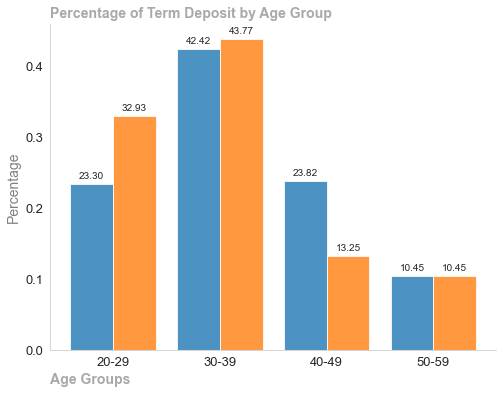

In [170]:
colors=['midnightblue','darkorange']
age_groups=['20-29','30-39','40-49','50-59']
term_deposit_0 = [0.233,0.42416,0.2382,0.1045]
term_deposit_1 =[0.3293,0.4377,0.1325,0.1045]
width=0.40
x= range(len(age_groups))
fig,ax = plt.subplots(figsize=(8,6))
bar1= ax.bar(x,term_deposit_0,width,label='Term Deposit 0', alpha=0.8)
bar2= ax.bar([i + width for i in x],term_deposit_1,width,label='Term Deposit 1', alpha=.8)
ax.set_xlabel('Age Groups',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_ylabel('Percentage',fontsize=14,color= 'grey')
ax.set_title('Percentage of Term Deposit by Age Group',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
ax.set_xticks([i+ width/2 for i in x])
ax.set_xticklabels(age_groups)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend
for i in x:
    ax.text(i,term_deposit_0[i] + 0.01/2, f'{term_deposit_0[i]*100:.2f}', ha='center',va='bottom')
    ax.text(i + width,term_deposit_1[i] + 0.01/2, f'{term_deposit_1[i]*100:.2f}', ha='center',va='bottom')   
sns.despine()
plt.grid(False)
plt.show

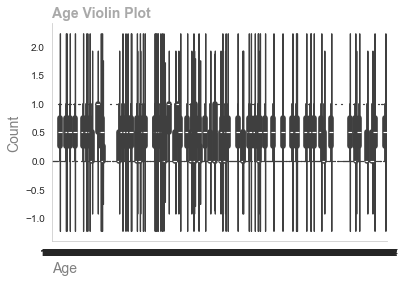

In [156]:
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
sns.violinplot(y='Attrition', x='Age', data=df_new)
plt.title("Age Violin Plot",fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Age',fontsize=14,color='grey',loc='left')
plt.ylabel('Count',fontsize=14,color= 'grey')
sns.despine()
plt.grid(False)
plt.show()

Gender

In [143]:
# Gender of employees
df_cat['Gender'].value_counts()

Gender
Male         783
Female       540
No Gender    147
Name: count, dtype: int64

In [154]:
df_new.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DailyRate',
       'MonthlyIncome', 'MonthlyRate'],
      dtype='object')

Marital Status

# Expoloratory Data Analysis

# Define Objectives

# Machine Learning Model Selection

# Model Training & Evaluation

# Results & Insights

# Interpret Results

# Conclusion

# Appendix

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
num_col = list(df_new.columns)
num_col.remove('Attrition')
for col in num_col:
    df_new[col] = df_new[col].astype(float)
    df_new[[col]] = scaler.fit_transform(df_new[[col]])
df_new['Attrition'] = pd.to_numeric(df_new['Attrition'], downcast='float')
df_new=df_new.round(2)
df_new.head()

In [ ]:

X=df_missing.drop('Attrition,axis=1')
y=df_not_missing=df_new.dropna(subset=['Attrition'])

num_samples_in_test= 147

X_train, X_test, y_train, y_test = train_test_split(df_not_missing.drop('Attrition',axis=1), 
               df_not_missing['Attrition'], 
               test_size = num_samples_in_test, random_state = 42)

# Display rows and columns
X_train.shape, X_test.shape,y_train.shape,y_test.shape

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()   

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

# Communication to Stakeholders